In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\asus\AppData\Local\Temp\ipykernel_25284\137835992.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the data
data_path = './Human_vital_signs_R.csv'
health_data = pd.read_csv(data_path)

# Verify column names
print("Training Data Columns:", health_data.columns)

Training Data Columns: Index(['Unnamed: 0', 'Time (s)', ' HR (BPM)', ' RESP (BPM)', ' SpO2 (%)',
       'TEMP (*C)', 'OUTPUT'],
      dtype='object')


In [3]:
health_data

,Unnamed: 0,Time (s),HR (BPM),RESP (BPM),SpO2 (%),TEMP (*C),OUTPUT
0,0,0,94.0,21.0,97.0,36.2,Normal
1,1,1,94.0,25.0,97.0,36.2,Normal
2,2,2,101.0,25.0,93.0,38.0,Abnormal
3,3,3,55.0,11.0,100.0,35.0,Abnormal
4,4,4,93.0,26.0,95.0,37.0,Normal
...,...,...,...,...,...,...,...
25488,476,476,56.0,12.0,101.0,33.0,Abnormal
25489,477,477,94.0,25.0,98.0,36.4,Normal
25490,478,478,94.0,21.0,97.0,36.2,Normal
25491,479,479,93.0,27.0,95.0,37.0,Normal


In [4]:
# Correct usage to drop unnecessary columns
health_data= health_data.drop(['Unnamed: 0', 'Time (s)', ' RESP (BPM)'], axis=1)

In [5]:
print("Training Data Columns:", health_data.columns)

Training Data Columns: Index([' HR (BPM)', ' SpO2 (%)', 'TEMP (*C)', 'OUTPUT'], dtype='object')


In [6]:
print(health_data.shape)
print(health_data.isnull().values.any())

(25493, 4)
True


In [7]:
health_data_cleaned = health_data.dropna()
print(health_data_cleaned.shape)


(25361, 4)


In [8]:
print(health_data_cleaned.isnull().values.any())


False


In [9]:
health_data_cleaned

,HR (BPM),SpO2 (%),TEMP (*C),OUTPUT
0,94.0,97.0,36.2,Normal
1,94.0,97.0,36.2,Normal
2,101.0,93.0,38.0,Abnormal
3,55.0,100.0,35.0,Abnormal
4,93.0,95.0,37.0,Normal
...,...,...,...,...
25488,56.0,101.0,33.0,Abnormal
25489,94.0,98.0,36.4,Normal
25490,94.0,97.0,36.2,Normal
25491,93.0,95.0,37.0,Normal


In [10]:
health_data_cleaned['OUTPUT'] = health_data_cleaned['OUTPUT'].str.strip().str.lower().replace({'normal': 0, 'abnormal': 1})

C:\Users\asus\AppData\Local\Temp\ipykernel_25284\1020532300.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  health_data_cleaned['OUTPUT'] = health_data_cleaned['OUTPUT'].str.strip().str.lower().replace({'normal': 0, 'abnormal': 1})
C:\Users\asus\AppData\Local\Temp\ipykernel_25284\1020532300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_data_cleaned['OUTPUT'] = health_data_cleaned['OUTPUT'].str.strip().str.lower().replace({'normal': 0, 'abnormal': 1})


In [11]:
health_data_cleaned

,HR (BPM),SpO2 (%),TEMP (*C),OUTPUT
0,94.0,97.0,36.2,0
1,94.0,97.0,36.2,0
2,101.0,93.0,38.0,1
3,55.0,100.0,35.0,1
4,93.0,95.0,37.0,0
...,...,...,...,...
25488,56.0,101.0,33.0,1
25489,94.0,98.0,36.4,0
25490,94.0,97.0,36.2,0
25491,93.0,95.0,37.0,0


In [12]:
column_names = health_data_cleaned.columns.tolist()
print("Column Names:", column_names)

Column Names: [' HR (BPM)', ' SpO2 (%)', 'TEMP (*C)', 'OUTPUT']


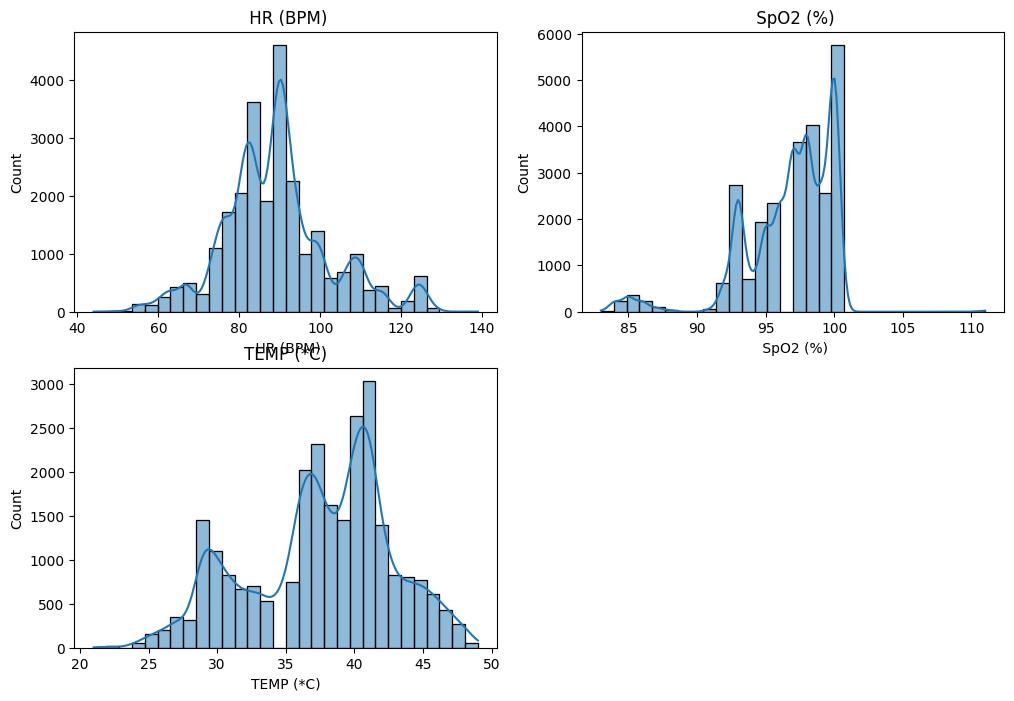

In [13]:
# Plot histograms for selected vital signs
plt.figure(figsize=(12, 8))
for i, column in enumerate([' HR (BPM)', ' SpO2 (%)', 'TEMP (*C)']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(health_data_cleaned[column], bins=30, kde=True)
    plt.title(column)

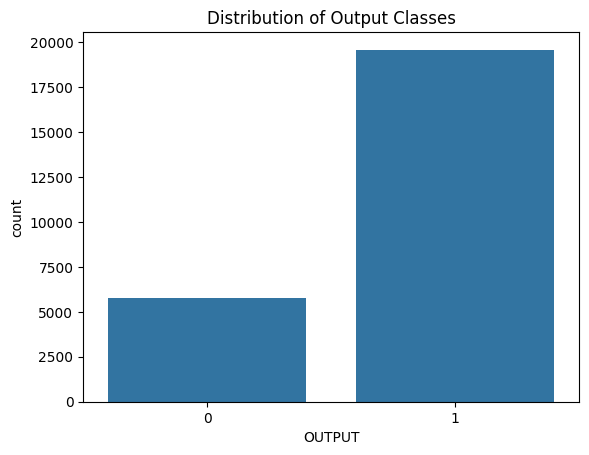

In [14]:
# Plot a count plot for the distribution of output classes
plt.figure()
sns.countplot(x='OUTPUT', data=health_data_cleaned)
plt.title("Distribution of Output Classes")
plt.show()

In [15]:
import pandas as pd

# Disons que df est votre DataFrame et 'OUTPUT' est la colonne cible avec des valeurs 0 et 1
# Séparer les classes
df_major = health_data_cleaned[health_data_cleaned['OUTPUT'] == 1]
df_minor = health_data_cleaned[health_data_cleaned['OUTPUT'] == 0]

# Répliquer les données de la classe minoritaire
df_minor_oversampled = df_minor.sample(n=len(df_major), replace=True, random_state=42)

# Combiner les deux classes pour obtenir un nouveau DataFrame équilibré
df_balanced = pd.concat([df_major, df_minor_oversampled])

# Mélanger les données pour éviter tout biais dans l'ordre
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


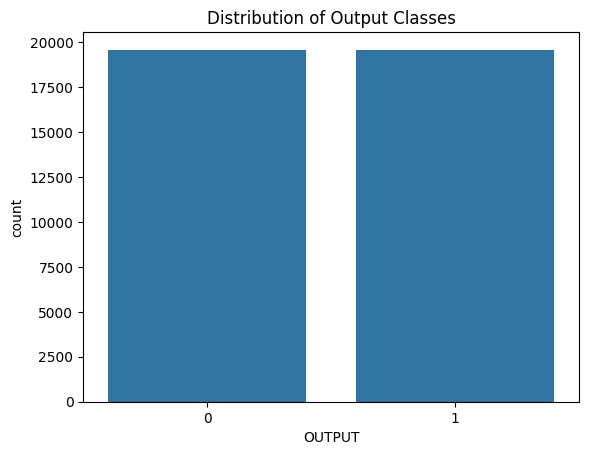

In [16]:
# Plot a count plot for the distribution of output classes
plt.figure()
sns.countplot(x='OUTPUT', data=df_balanced)
plt.title("Distribution of Output Classes")
plt.show()

In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [74]:
#preparing the dataset
X = df_balanced.iloc[:,:-1]
Y = df_balanced['OUTPUT']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20)

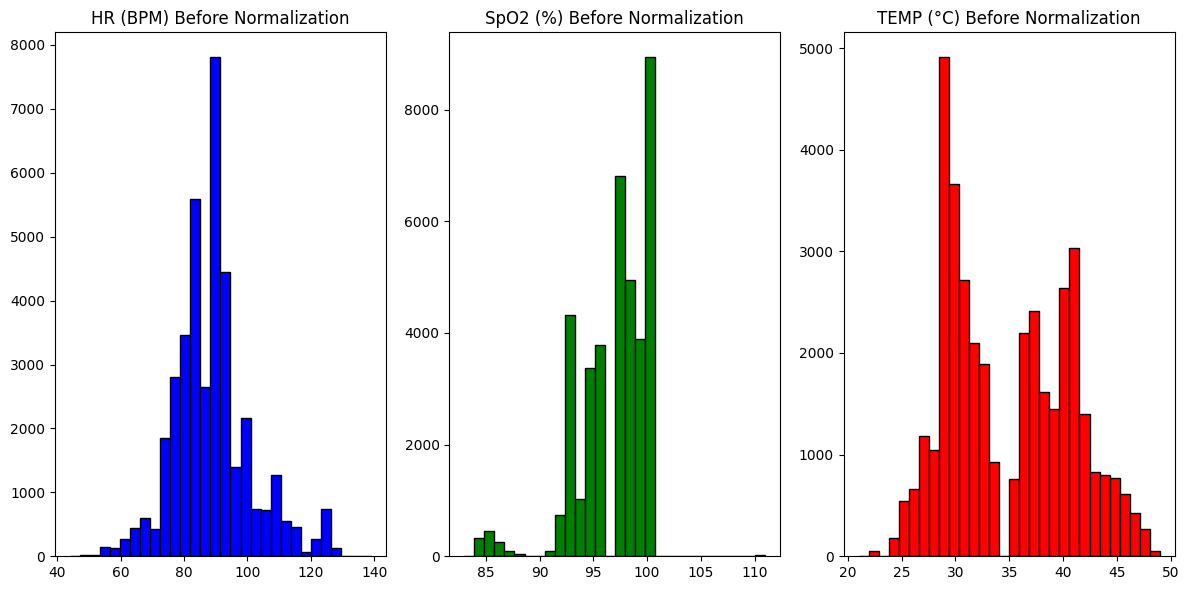

In [77]:
# Tracer les données avant la normalisation
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(X[' HR (BPM)'], bins=30, color='blue', edgecolor='black')
plt.title('HR (BPM) Before Normalization')

plt.subplot(1, 3, 2)
plt.hist(X[' SpO2 (%)'], bins=30, color='green', edgecolor='black')
plt.title('SpO2 (%) Before Normalization')

plt.subplot(1, 3, 3)
plt.hist(X['TEMP (*C)'], bins=30, color='red', edgecolor='black')
plt.title('TEMP (°C) Before Normalization')

plt.tight_layout()
plt.show()


In [79]:
# Création de l'objet StandardScaler
scaler = StandardScaler()

# Appliquer la normalisation
X_scaled = scaler.fit_transform(X)

# Convertir en DataFrame pour une manipulation facile
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


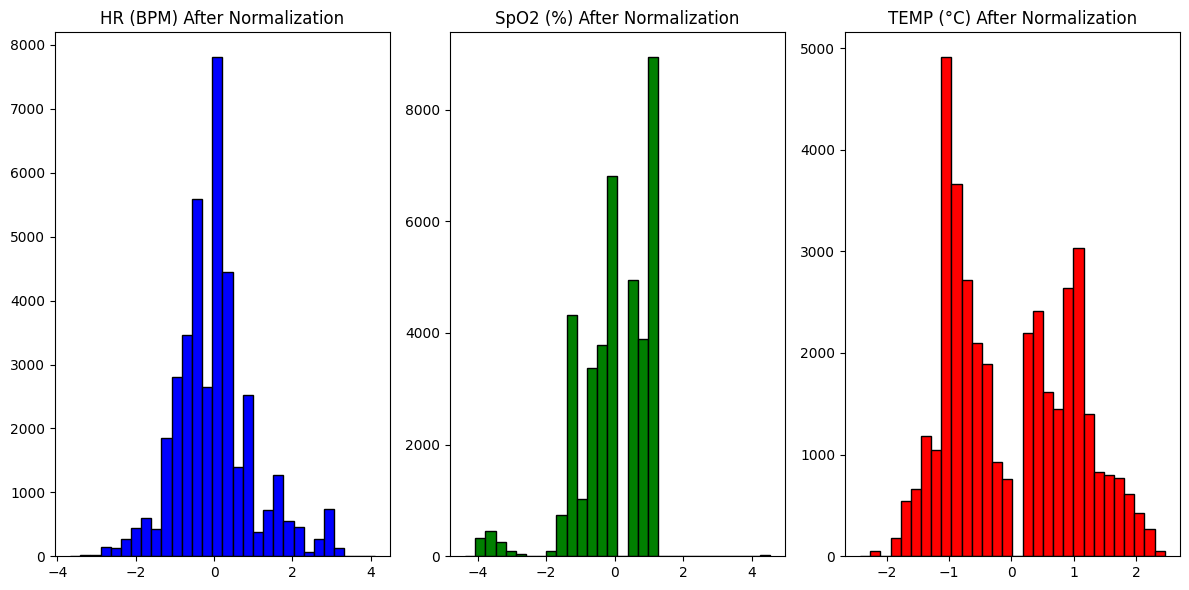

In [83]:
# Tracer les données après la normalisation
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(X_scaled_df[' HR (BPM)'], bins=30, color='blue', edgecolor='black')
plt.title('HR (BPM) After Normalization')

plt.subplot(1, 3, 2)
plt.hist(X_scaled_df[' SpO2 (%)'], bins=30, color='green', edgecolor='black')
plt.title('SpO2 (%) After Normalization')

plt.subplot(1, 3, 3)
plt.hist(X_scaled_df['TEMP (*C)'], bins=30, color='red', edgecolor='black')
plt.title('TEMP (°C) After Normalization')

plt.tight_layout()
plt.show()


In [104]:
# # Supposons que 'df' est votre DataFrame et 'target' est la colonne cible
# X = df_balanced.iloc[:,:-1]
# Y = df_balanced['OUTPUT']

# # Normalisation des caractéristiques pour améliorer la performance du modèle
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Division des données en ensembles d'entraînement et de test
# x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.40, random_state=42)


In [105]:
def evaluate_model(model, x_train, y_train, x_test, y_test, model_name):
    # Entraînement du modèle
    model.fit(x_train, y_train)
    
    # Prédiction sur l'ensemble de test
    y_pred = model.predict(x_test)
    
    # Évaluation du modèle
    print(f"{model_name}")
    report = classification_report(y_test, y_pred, output_dict=True)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    
    # Affichage des métriques globales
    print("Global Metrics:")
    print(f"Precision (macro avg): {report['macro avg']['precision']:.2f}")
    print(f"Recall (macro avg): {report['macro avg']['recall']:.2f}")
    print(f"F1-Score (macro avg): {report['macro avg']['f1-score']:.2f}")
    print(f"Precision (weighted avg): {report['weighted avg']['precision']:.2f}")
    print(f"Recall (weighted avg): {report['weighted avg']['recall']:.2f}")
    print(f"F1-Score (weighted avg): {report['weighted avg']['f1-score']:.2f}")
    
    # Utilisation de la validation croisée pour évaluer la généralisation du modèle
    cv_scores = cross_val_score(model, X_scaled, Y, cv=5)
    print("Cross-Validation Accuracy Scores:", cv_scores)
    print("Mean CV Accuracy:", np.mean(cv_scores))
    
    # Affichage de la matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()


Naive Bayes
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7769
           1       0.97      0.97      0.97      7895

    accuracy                           0.97     15664
   macro avg       0.97      0.97      0.97     15664
weighted avg       0.97      0.97      0.97     15664

Confusion Matrix:
[[7550  219]
 [ 242 7653]]
Accuracy Score: 0.9705694586312564
Global Metrics:
Precision (macro avg): 0.97
Recall (macro avg): 0.97
F1-Score (macro avg): 0.97
Precision (weighted avg): 0.97
Recall (weighted avg): 0.97
F1-Score (weighted avg): 0.97
Cross-Validation Accuracy Scores: [0.97088866 0.97088866 0.97165475 0.97062955 0.96628783]
Mean CV Accuracy: 0.9700698906378868


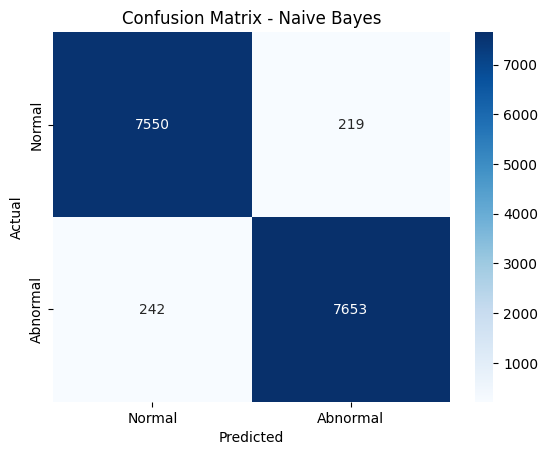

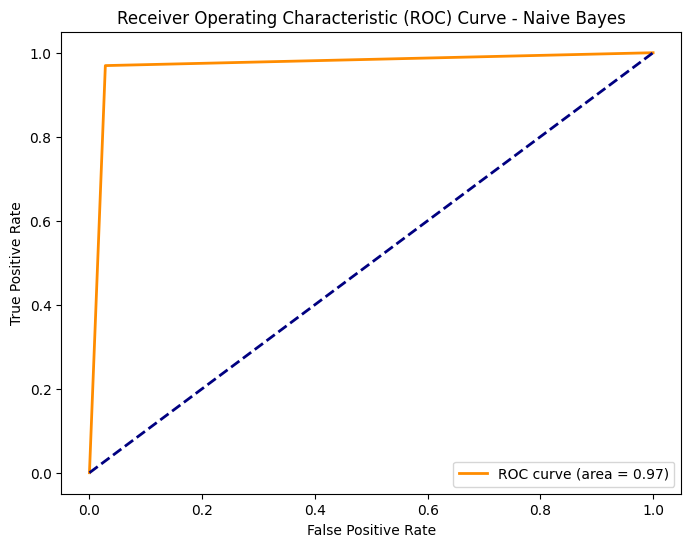

In [110]:
# Évaluation du modèle Naive Bayes
nb_model = GaussianNB()
evaluate_model(nb_model, x_train, y_train, x_test, y_test, "Naive Bayes")


SVM
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7769
           1       0.98      0.96      0.97      7895

    accuracy                           0.97     15664
   macro avg       0.97      0.97      0.97     15664
weighted avg       0.97      0.97      0.97     15664

Confusion Matrix:
[[7611  158]
 [ 278 7617]]
Accuracy Score: 0.9721654749744637
Global Metrics:
Precision (macro avg): 0.97
Recall (macro avg): 0.97
F1-Score (macro avg): 0.97
Precision (weighted avg): 0.97
Recall (weighted avg): 0.97
F1-Score (weighted avg): 0.97
Cross-Validation Accuracy Scores: [0.97280388 0.97216547 0.97318693 0.97062955 0.96909718]
Mean CV Accuracy: 0.971576601806106


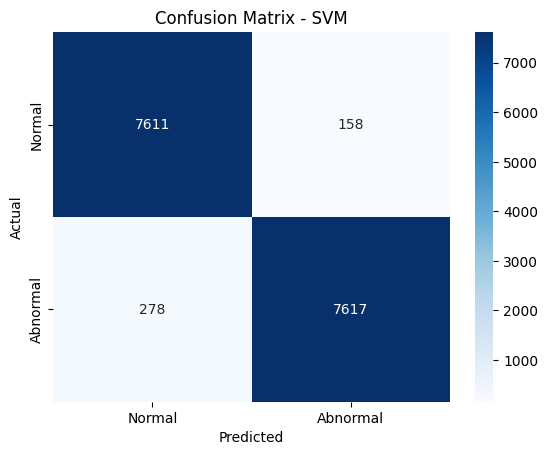

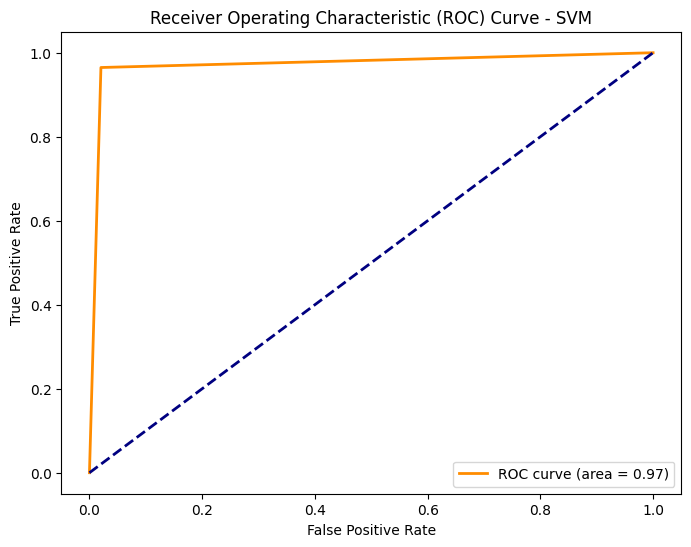

In [111]:
# Évaluation du modèle SVM
svm_model = SVC(kernel='linear', random_state=42)
evaluate_model(svm_model, x_train, y_train, x_test, y_test, "SVM")


Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7769
           1       0.98      0.96      0.97      7895

    accuracy                           0.97     15664
   macro avg       0.97      0.97      0.97     15664
weighted avg       0.97      0.97      0.97     15664

Confusion Matrix:
[[7611  158]
 [ 278 7617]]
Accuracy Score: 0.9721654749744637
Global Metrics:
Precision (macro avg): 0.97
Recall (macro avg): 0.97
F1-Score (macro avg): 0.97
Precision (weighted avg): 0.97
Recall (weighted avg): 0.97
F1-Score (weighted avg): 0.97
Cross-Validation Accuracy Scores: [0.97280388 0.97229316 0.97293156 0.97062955 0.96909718]
Mean CV Accuracy: 0.9715510655446147


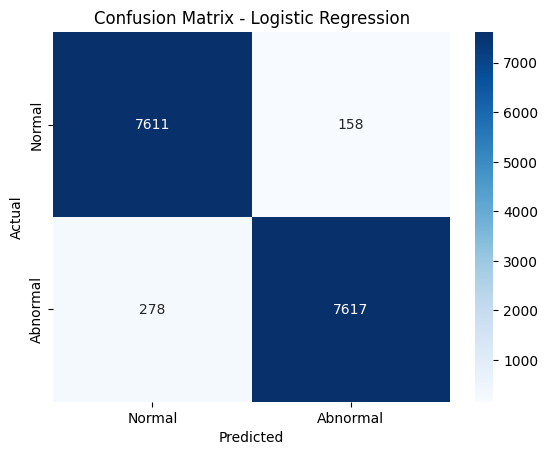

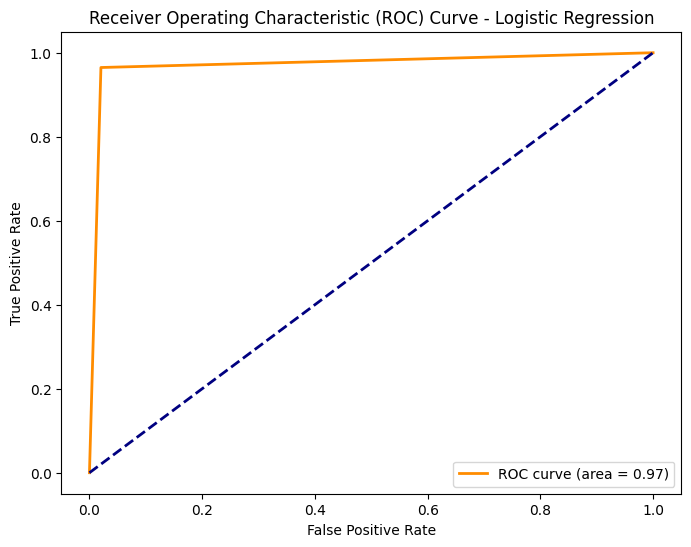

In [112]:
# Évaluation du modèle Logistic Regression
lr_model = LogisticRegression(random_state=42)
evaluate_model(lr_model, x_train, y_train, x_test, y_test, "Logistic Regression")


In [113]:
from sklearn.model_selection import cross_val_score

# Modèles
models = {
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='linear', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Évaluation avec validation croisée
for name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, Y, cv=5)
    print(f"{name} - Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"{name} - Mean CV Accuracy: {np.mean(cv_scores):.2f}")


Naive Bayes - Cross-Validation Accuracy Scores: [0.97088866 0.97088866 0.97165475 0.97062955 0.96628783]
Naive Bayes - Mean CV Accuracy: 0.97
SVM - Cross-Validation Accuracy Scores: [0.97280388 0.97216547 0.97318693 0.97062955 0.96909718]
SVM - Mean CV Accuracy: 0.97
Logistic Regression - Cross-Validation Accuracy Scores: [0.97280388 0.97229316 0.97293156 0.97062955 0.96909718]
Logistic Regression - Mean CV Accuracy: 0.97
